# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [39]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

Populating the interactive namespace from numpy and matplotlib


In [40]:
!wget https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip
!wget https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip

In [41]:
!unzip 201501-citibike-tripdata.zip
!unzip 201506-citibike-tripdata.zip

In [42]:
!rm -f 201501-citibike-tripdata.zip
!rm -f 201506-citibike-tripdata.zip

In [43]:
!mv 201501-citibike-tripdata.csv $PUIDATA
!mv 201506-citibike-tripdata.csv $PUIDATA

In [44]:
!ls $PUIDATA

In [45]:
#df1 = pd.read_csv("%s/201501-citibike-tripdata.csv"%os.getenv("PUI2018"))

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [46]:
df1 = pd.read_csv("~/PUIdata/201501-citibike-tripdata.csv")
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [47]:
df2 = pd.read_csv("~/PUIdata/201506-citibike-tripdata.csv")
#df2 = pd.read_csv("%s/201506-citibike-tripdata.csv"%os.getenv("PUI2018"))
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [49]:
df = pd.concat([df1,df2],axis=0)
df = df.reset_index(drop=True)
# Important! reset index!
#df.head()
#df.tail()

In [50]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
df['time'] = df['date'].dt.hour

# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,0


In [51]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'time'],
      dtype='object')

# SPLIT BY CATEGORY

I am splitting data by riding at day or night and looking at trip duration of riders:

## **H0: The trip duration of day ridings is shorter than or the same as night ridings**

## **H1: The trip duration of day ridings is longer than night ridings**

## $ \alpha = 0.05 $


In [83]:
#dropping some data I no longer need
df2 = df[['tripduration','time']]

In [105]:
df2['tripd_day'] = df2['tripduration'][(df2['time']>4) & (df2['time']<=17)]
df2['tripd_night'] = df2['tripduration'][(df2['time']<=4) | (df2['time']>17)]
df2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tripduration,time,tripd_day,tripd_night
0,1346,0,NaN,1346.0
1,363,0,NaN,363.0
2,346,0,NaN,346.0
3,182,0,NaN,182.0
4,969,0,NaN,969.0


In [107]:
# dropping NaN values
df2['tripd_day'].dropna(inplace=True)
df2['tripd_night'].dropna(inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [108]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df2.describe()

,tripduration,time,tripd_day,tripd_night
count,1.226771e+06,1.226771e+06,8.566160e+05,370155.000000
mean,8.463465e+02,1.390772e+01,8.507399e+02,836.179068
std,3.052017e+03,4.939333e+00,3.256950e+03,2514.479879
min,6.000000e+01,0.000000e+00,6.000000e+01,60.000000
25%,3.810000e+02,1.000000e+01,3.810000e+02,383.000000
50%,6.050000e+02,1.500000e+01,6.020000e+02,614.000000
75%,9.920000e+02,1.800000e+01,9.870000e+02,1001.000000
max,1.691873e+06,2.300000e+01,1.691873e+06,518019.000000


lets run the scipy KS test

In [109]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# 1. KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?
### **H0: The trip duration of day ridings is shorter than or the same as night ridings**

### **H1: The trip duration of day ridings is longer than night ridings**

### $ \alpha = 0.05 $


## 1.1 KS tests with the entire datase

In [111]:
ks = scipy.stats.ks_2samp(df2.tripd_day, df2.tripd_night)
print (ks)

Ks_2sampResult(statistic=0.012626765221197545, pvalue=3.094187943340761e-36)


#### Answer:
p-value = 3.094187943340761e-36, which can be defined as 0, so it is smaller than 0.05. In this way, we can reject the **Null hypothesis**: 

H0: The trip duration of day ridings is shorter than or the same as night ridings

**Conclusion: The trip duration of day ridings is longer than night ridings.**


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

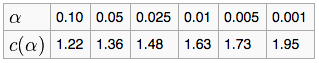

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

## 1.2 KS test with a subset 200 times smaller

In [116]:
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df3 = df2.sample(len(df2)//200,random_state=100)
ks2 = scipy.stats.ks_2samp(df3.tripd_day, df3.tripd_night)
print (ks2)

Ks_2sampResult(statistic=0.3952388716778086, pvalue=0.0)


#### Answer:
p-value = 0.0, so it is smaller than 0.05. In this way, we can reject the **Null hypothesis**: 

H0: The trip duration of day ridings is shorter than or the same as night ridings

**Conclusion: The trip duration of day ridings is longer than night ridings.**

# 2. Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.
### **H0: The trip duration of day ridings is shorter than or the same as night ridings**

### **H1: The trip duration of day ridings is longer than night ridings**

### $ \alpha = 0.05 $


# 2.1 Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [137]:
np.random.seed(666)
tripd_Day = df2['tripd_day'].sample(10000)
tripd_Night = df2['tripd_night'].sample(10000)

pearson = scipy.stats.pearsonr(tripd_Day,tripd_Night)
print(pearson)

(-0.009340207101234763, 0.3503429325848446)


#### Answer:
r = -0.009, which means tripd_Day and tripd_Night have an extreme weak negative correlation.

p-value = 0.35, so it is bigger than 0.05. In this way, we cannot reject the **Null hypothesis**: 

H0: The trip duration of day ridings is shorter than or the same as night ridings.

**Conclusion: The trip duration of day ridings is shorter than or the same as night ridings. There is no significant statistic difference between daytime riding duration and nighttime riding duration**

# 2.2 Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [138]:
spearman = scipy.stats.spearmanr(tripd_Day,tripd_Night)
print(spearman)

SpearmanrResult(correlation=0.002946913654235441, pvalue=0.7682573151563765)


#### Answer:
correlation = 0.003, which means tripd_Day and tripd_Night have an extreme weak negative correlation.

p-value = 0.768, so it is much bigger than 0.05. In this way, we cannot reject the **Null hypothesis**: 

H0: The trip duration of day ridings is shorter than or the same as night ridings

**Conclusion: The trip duration of day ridings is shorter than or the same as night ridings. There is no significant statistic difference between daytime riding duration and nighttime riding duration**